# Проект "Анализ фильмов и сериалов Netflix"

## Описание датасета

- show_id - Unique ID for every Movie / Tv Show 
- type - Identifier - A Movie or TV Show
- title - Title of the Movie / Tv Show
- director - Director of the Movie
- cast - Actors involved in the movie / show
- country - Country where the movie / show was produced 
- date_added - Date it was added on Netflix
- release_year - Actual Release year of the move / show
- rating - TV Rating of the movie / show
- duration - Total Duration - in minutes or number of seasons
- listed_in – Genere
- description - The summary description

## Задания

- определение цели анализа
- работа с пропусками
- выявление зависимостей
- создание новых переменных 
- сортировка
- фильтрация 
- группировка
- определение и работа с выбросами 
- проверка гипотез 
- визуализация 
- выводы

## Импорты

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Графики
import seaborn as sns
%matplotlib inline
from ipywidgets import interact, IntSlider, FloatSlider # Интерактив 
from scipy import stats as st # Проверка гипотез

## Загрузка датасета

In [62]:
df = pd.read_csv("netflix_titles.csv")

In [63]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


В данных есть следующие проблемы: пропуски в режисере, актерах, стране, дате добавления, рэйтинге, продолжительности. Кроме того есть проблемы с типами данных.

## Очистка данных

### Полные дубликаты

In [65]:
df.duplicated().sum()

0

Полные дубликаты строк отсутствуют.

In [66]:
titles = df['title'].value_counts()
titles[titles>1]

Series([], Name: title, dtype: int64)

Все названия фильмов уникальны.

In [67]:
df["show_id"].value_counts()

s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64

id тоже уникальны.

### Неявные дубликаты в категориях

In [68]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [69]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

Дубликатов нет, но много фильмов, где в производстве учавствует сразу несколько стран. Это нужно учитывать в анализе.

In [70]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

Странные рейтинги 74 min, 84 min, 66 min.

In [71]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Это явно ошибки.

In [72]:
df.query("rating in ('74 min', '84 min', '66 min')")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Перенесём значения в переменную длительность. А здесь поставим неявный пропуск "UNK".

In [73]:
df.query("rating in ('74 min', '84 min', '66 min')")['duration'] =  df.query("rating in ('74 min', '84 min', '66 min')")['rating']

<ipython-input-73-463586eff66a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.query("rating in ('74 min', '84 min', '66 min')")['duration'] =  df.query("rating in ('74 min', '84 min', '66 min')")['rating']


In [74]:
df.query("rating in ('74 min', '84 min', '66 min')")['rating'] = 'UNK'

<ipython-input-74-0deca31ca117>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.query("rating in ('74 min', '84 min', '66 min')")['rating'] = 'UNK'


In [75]:
df["listed_in"].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

У одного фильма или сериала может быть несколько жанров.

### Пропуски

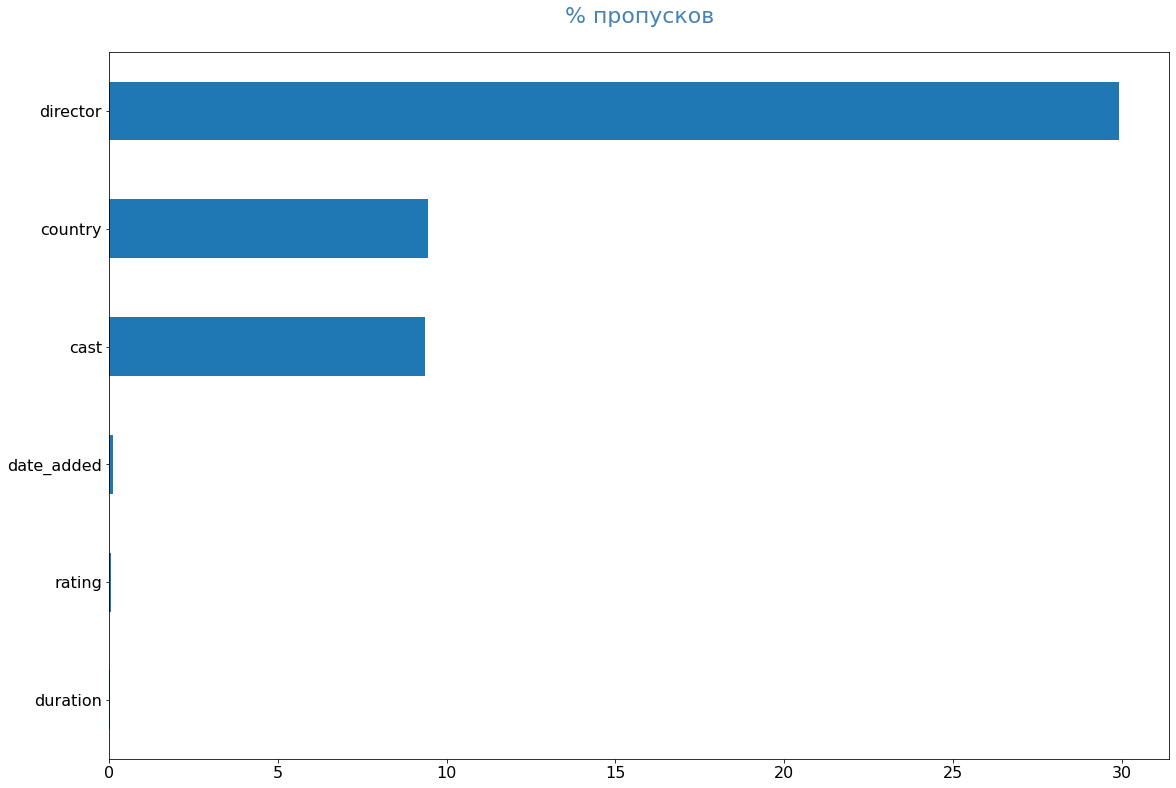

In [76]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,13), rot = 0, legend = False, fontsize = 16)
            .set_title('% пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')
pass_value_barh(df)

Больше всего пропусков в режиссере стране и кастинге. Но не привлекая сторонние данные адекватно заполнить их не выйдет, поэтому создадим отдельную категорию "Unknown". И запишем в пропуски её.

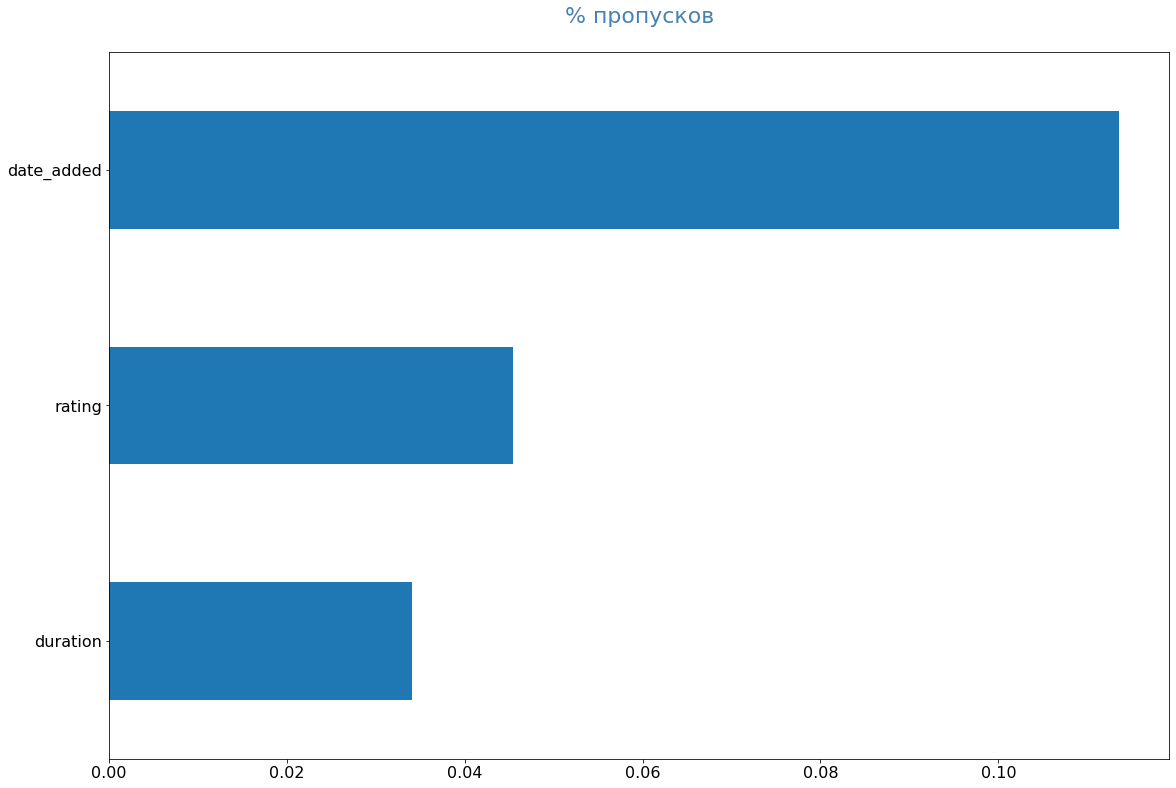

In [77]:
df["director"] = df["director"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
pass_value_barh(df)

Осталось совсем мало пропусков, но с ними желательно всё таки что то сделать.

In [78]:
df["rating"] = df["rating"].fillna("UNK")

Длительность можно заполнить по самой часто встречаемой длительности (моде).

In [79]:
df["duration"] = df["duration"].fillna(df["duration"].mode())

Остался date_added. Можно посмотреть на годы выхода, если есть.

In [80]:
df[df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Можно впринципе и удалить эти данные, так как есть пропуски и в других столбцах.

In [81]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8794 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8794 non-null   object
 1   type          8794 non-null   object
 2   title         8794 non-null   object
 3   director      8794 non-null   object
 4   cast          8794 non-null   object
 5   country       8794 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8794 non-null   int64 
 8   rating        8794 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8794 non-null   object
 11  description   8794 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.1+ KB


### Работа с типами
Мало что можно сделать. Можно попробовать обработать длительность как число и date_added как datetime.

In [82]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

Продолжительность измеряется как в сезонах, так и в минутах. Может это зависит от того фильм это или шоу?

In [83]:
df[df['type'] == 'TV Show']['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

У TV Show сезоны, а не минуты.

In [84]:
df[df['type'] != 'TV Show']['duration'].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

А у фильмов минуты. Можно создать две переменные seasons и minutes.

In [85]:
df['seasones'] = df[df['type'] == 'TV Show']['duration'].str.extract(r'(\d+)').astype(int)

In [86]:
df['minutes'] = df[df['type'] != 'TV Show']['duration'].str.extract(r'(\d+)').astype(int)

In [87]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasones,minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,90.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,NaN
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,NaN
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,NaN


Всё получилось, из за пропусков int сконвертировался во float. Но заполнять или удалять здесь нет смысла во избежании порчи статистики.

## Анализ данных

### Описательная статистика по численным переменным.

In [88]:
df.describe()

,release_year,seasones,minutes
count,8794.000000,2666.000000,6128.000000
mean,2014.183534,1.751313,99.577187
std,8.823527,1.550176,28.290593
min,1925.000000,1.000000,3.000000
25%,2013.000000,1.000000,87.000000
50%,2017.000000,1.000000,98.000000
75%,2019.000000,2.000000,114.000000
max,2021.000000,17.000000,312.000000


Фильмы в базе выпущены от 1925 до 2021 года. Медианное количество сезонов - 1. Максимальное - 17. Средняя продолжительность фильма 99 минут.

### Год выпуска
Интерактивная гистограмма по году выпуска.

In [89]:
def year_hist(min_year, bins):
    fig, ax = plt.subplots(1, 1,figsize=(15,20));
    ax.set_xlabel("Year");
    ax.set_ylabel("Count");
    df.query("release_year >= @min_year").release_year.hist(bins=bins,
                                           ax=ax, 
                                           figsize=(15,10));
num_bins = IntSlider(min = 5, max = 50, step = 1, value = 15)
start = IntSlider(min = 1925, max = 2021, step = 1, value = 1990)

In [90]:
interact(year_hist, min_year=start, bins=num_bins);

interactive(children=(IntSlider(value=1990, description='min_year', max=2021, min=1925), IntSlider(value=15, d…

Основная часть тайтлов выпущена после 2015 года.

In [91]:
def lim_boxplot(min_year):
    fig, ax = plt.subplots(1, 1, figsize = (10, 10));
    df.boxplot(fontsize=16, ax=ax, column=["release_year"], figsize=(10, 10));
    ax.set_ylim(min_year, None);
    ax.set_title(f'Year > {min_year}');
start = IntSlider(min = 1925, max = 2021, step = 1, value = 1975)
interact(lim_boxplot, min_year=start);

interactive(children=(IntSlider(value=1975, description='min_year', max=2021, min=1925), Output()), _dom_class…

Нижняя граница даты релиза основной массы тайтлов расположена на уровне 2005 года.

### Количество сезонов

In [92]:
def season_hist(max_seasons, bins):
    fig, ax = plt.subplots(1, 1,figsize=(15,20));
    ax.set_xlabel("Seasons");
    ax.set_ylabel("Count");
    df.query("seasones <= @max_seasons").seasones.hist(bins=bins,
                                           ax=ax, 
                                           figsize=(15,10));
num_bins = IntSlider(min = 5, max = 50, step = 5, value = 5)
max_seasons = IntSlider(min = 1, max = 17, step = 1, value = 10)
interact(season_hist, max_seasons=max_seasons, bins=num_bins);

interactive(children=(IntSlider(value=10, description='max_seasons', max=17, min=1), IntSlider(value=5, descri…

Сериалы и TV Show в основном представлены 1-2 сезонами.

### Длительность фильмов

In [93]:
def duration_hist(max_duration, bins):
    fig, ax = plt.subplots(1, 1,figsize=(15,20));
    ax.set_xlabel("Duration (min)");
    ax.set_ylabel("Count");
    df.query("minutes <= @max_duration").minutes.hist(bins=bins,
                                           ax=ax, 
                                           figsize=(15,10));
num_bins = IntSlider(min = 5, max = 50, step = 5, value = 15)
max_duration = IntSlider(min = 10, max = 1000, step = 10, value = 160)
interact(duration_hist, max_duration=max_duration, bins=num_bins);

interactive(children=(IntSlider(value=160, description='max_duration', max=1000, min=10, step=10), IntSlider(v…

Лидируют фильмы на 90 минут - полтора часа. Посмотрим на выбросы.

In [94]:
def lim_boxplot(min_duration, max_duration):
    fig, ax = plt.subplots(1, 1, figsize = (10, 10));
    df.boxplot(fontsize=16, ax=ax, column=["minutes"], figsize=(10, 10));
    ax.set_ylim(None, max_duration);
    ax.set_ylabel("Duration (min)")
    ax.set_title(f'{min_duration} < Duration (min.) < {max_duration}');
min_duration = IntSlider(min = 0, max = 500, step = 10, value = 50)
max_duration = IntSlider(min = 0, max = 500, step = 10, value = 200)
interact(lim_boxplot, min_duration=min_duration, max_duration=max_duration);

interactive(children=(IntSlider(value=50, description='min_duration', max=500, step=10), IntSlider(value=200, …

Основная продолжительность фильмов лежит в диапазоне от 50 до 150 минут.

### Категориальные переменные тип тайтла и рейтинг

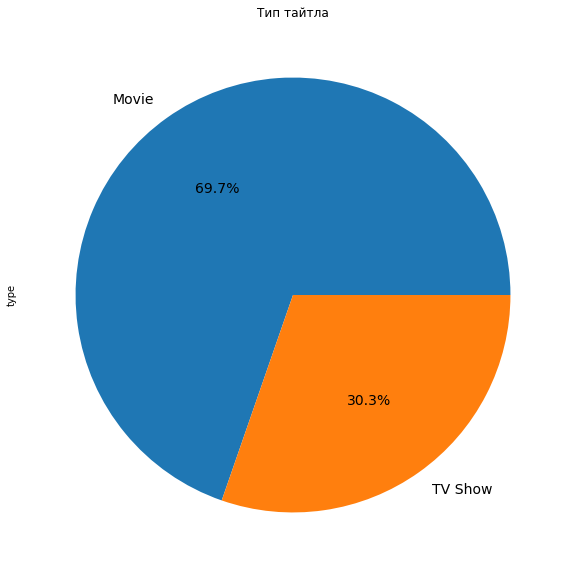

In [95]:
df['type'].value_counts().plot(kind='pie', title="Тип тайтла", fontsize=14, autopct='%1.1f%%', figsize=(10,10));

Большая часть относится к фильмам. Посмотрим на топ-5 рейтингов.

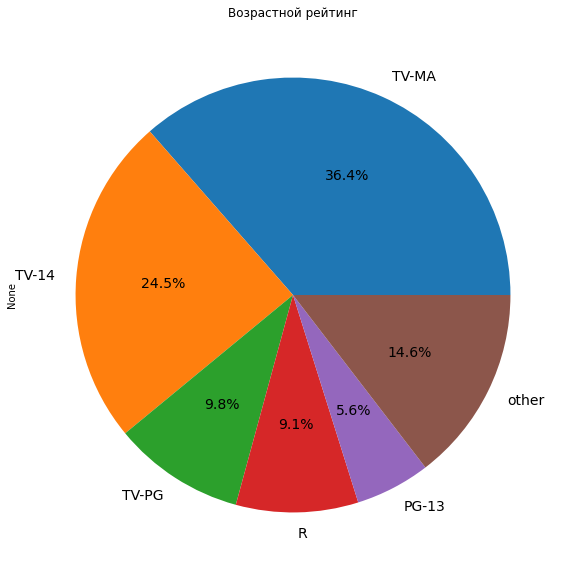

In [96]:
df_cert = df.rating.value_counts().sort_values(ascending=False)
df_cert
top_5 = df_cert[0:5].copy();
other_cert = df_cert.sum() - top_5.sum()
top_5 = top_5.append(pd.Series(other_cert, index=["other"]))
top_5.plot(kind='pie', title="Возрастной рейтинг", fontsize=14, autopct='%1.1f%%', figsize=(10,10));

Лидируют фильмы со взрослым и подростковым рейтингом.

## Продвинутый анализ данных
Определим вспомогательные функции:

In [97]:
# функция для разбиения данных в колонке
def split_values(value: str):
    if not isinstance(value, str):
        return value

    splitted = value.split(', ')
    if (isinstance(splitted, str)):
        return [splitted]
    else:
        return splitted

# функция, которая возвращает обработанные нужные нам данные из DataFrame
def get_filtered_series(df: pd.DataFrame, path: str, count_filter: int):
    return (
        df[path]
            .where(~df[path].isin(["Unknown", "UNK"]))
            .explode()
            .dropna()
            .apply(split_values)
            .explode()
            .value_counts(ascending=False)
            .where(lambda count: count >= count_filter)
            .dropna()
    )

### Какая страна произвела наибольшее количество контента за все годы

Построим горизонтальный график распределения количества фильмов по странам. Для этого:
1. Возьмем данные по столбцу "Страна"
1. Разобъем значения стран по-отдельности, если у фильма их было несколько
1. Отфильтруем страны по динамическому фильтру.
1. Сконфигурируем график

In [98]:
def countries_plot(min_limit):
    countries_series = get_filtered_series(df, 'country', min_limit)
    fig, ax = plt.subplots(figsize = (25, 35)) #фигуры, изменить размер
    ax = countries_series.plot(kind = 'barh')
    ax.bar_label(ax.containers[0], fontsize = 24) #показало конкрентные числова справа
    plt.ylabel('Countries', fontsize = 32) #пояснение по оси У
    plt.xticks(size=24)
    plt.yticks(size=24)
    plt.title('Distribution of Contries', fontweight = 'bold')
    plt.show()

min_limit = IntSlider(min = 10, max = 1000, step = 10, value = 50)
interact(countries_plot, min_limit=min_limit);

interactive(children=(IntSlider(value=50, description='min_limit', max=1000, min=10, step=10), Output()), _dom…

Тройка лидеров: США, Индия, Великобритания.

### Какие режиссеры самые продуктивные за последние 10 лет?

Построим горизонтальный график распределения количества фильмов по режиссерам. Для этого:
1. Возьмем данные по столбцу "Режиссер"
1. Разобъем значения режиссеров по-отдельности, если у фильма их было несколько
1. Отфильтруем режиссеров, снявших менее 10 фильмов
1. Сконфигурируем график

In [99]:
def directors_plot(min_limit):
    director_series = get_filtered_series(df.query('release_year > 2012'), 'director', min_limit)
    fig, ax = plt.subplots(figsize = (25, 15)) #фигуры, изменить размер
    ax = director_series.plot(kind = 'barh')
    ax.bar_label(ax.containers[0], fontsize = 24) #показало конкрентные числова справа
    plt.ylabel('Directors', size=32) #пояснение по оси У
    plt.xticks(size=24)
    plt.yticks(size=24)
    plt.title('Distribution of Directors', fontweight = 'bold')
    plt.show()

min_limit = IntSlider(min = 1, max = 22, step = 1, value = 10)
interact(directors_plot, min_limit=min_limit);

interactive(children=(IntSlider(value=10, description='min_limit', max=22, min=1), Output()), _dom_classes=('w…

Самые популярные режиссеры Jan Suter, Raul Campos, Suhas Kadav.

### В каких странах какой жанр и тип контента наиболее часто производим?

Построим графики распределения жанров и типов контента по топ-5 странам. Для этого:
1. Возьмем топ-5 стран производителей
1. Запишем их в датасет для группировки
1. Построим график по типу контента
    1. Группируем данные по стране из топ-5 и типу контента
    1. Задаем параметры графика
1. Построим график по жанру
    1. Находим топ-10 жанров, чтобы сузить выборку
    1. Записываем пересечения по жанрам из топ-10
    1. Группируем данные по стране из топ-5 и жанру из топ-10
    1. Задаем параметры графика

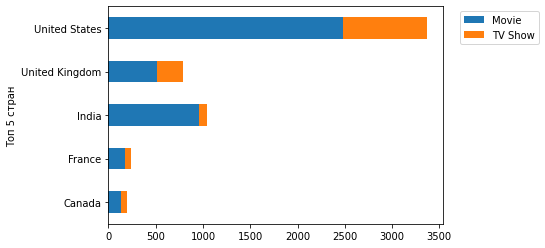

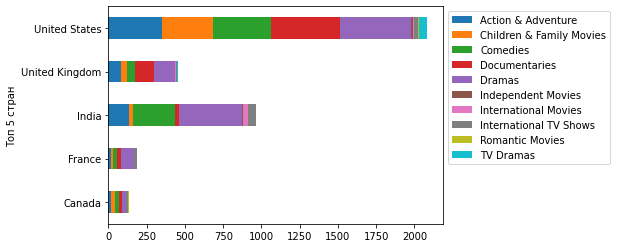

In [100]:
countries_series = get_filtered_series(df, 'country', 0)
top_5_countries = countries_series.nlargest(n=5).keys()

def set_top_country(countries):
    country = set(countries).intersection(top_5_countries)
    if (len(country) > 0):
        return list(country)[0]

df['top_country'] = (
    df['country']
        .dropna()
        .apply(split_values)
        .apply(set_top_country)
)

(
    df
        .groupby('top_country')['type']
        .value_counts()
        .unstack()
        .plot(kind='barh', stacked=True)
)

plt.ylabel('Топ 5 стран')
plt.legend(bbox_to_anchor = (1.3, 1)) #переместить легенду
plt.show()

top_10_genres = (
    get_filtered_series(df, 'listed_in', 0)
        .head(10)
        .keys()
)

def set_top_genres(listed_in: str):
    splitted = listed_in.split(', ')
    if (isinstance(splitted, str)):
        if (listed_in in top_10_genres):
            return listed_in
    elif (isinstance(splitted[0], str) & (splitted[0] in top_10_genres)):
        return splitted[0]

df['listed_in_processed'] = (
    df['listed_in']
        .dropna()
        .apply(set_top_genres)
        .dropna()
)

(
    df
        .groupby('top_country')['listed_in_processed']
        .value_counts()
        .unstack()
        .plot(kind='barh', stacked=True)
)

plt.ylabel('Топ 5 стран')
plt.legend(bbox_to_anchor = (1, 1)) #переместить легенду
plt.show()

## Проверка гипотез

## Зависят ли возрастные рейтинги и режиссеры?

Используем критерий Хи-квадрат, так как у нас 2 категориальных переменных.

In [101]:
df_dr = df[['rating', 'director']].copy()
df_dr['director'] = df_dr['director'].apply(split_values)

In [102]:
df_dr = df_dr.explode('director').reset_index(drop=True)
df_dr['director'] = df_dr['director'].where(df_dr['director'] != 'Unknown')
df_dr = df_dr.dropna()
df_dr

,rating,director
0,PG-13,Kirsten Johnson
2,TV-MA,Julien Leclercq
5,TV-MA,Mike Flanagan
6,PG,Robert Cullen
7,PG,José Luis Ucha
...,...,...
9593,TV-MA,Majid Al Ansari
9594,R,David Fincher
9596,R,Ruben Fleischer
9597,PG,Peter Hewitt


In [103]:
crosstab = pd.crosstab(df_dr.rating, df_dr.director)

stat, pvalue, _, _ = st.chi2_contingency(crosstab)

alpha = 0.05
print(f'Statistics={stat}, p-value: {pvalue}')
if pvalue <= alpha:
    print('Зависимый (отклонить H0)')
else:
    print('Независимый (не удается отклонить H0)')

Statistics=77397.44700185192, p-value: 1.5430452603116766e-84
Зависимый (отклонить H0)


Рейтинг зависит от режиссера.

### Зависят ли возрастные рейтинги и страна?

In [104]:
df_rc = df[['rating', 'country']].copy()
df_rc['country'] = df_rc['country'].apply(split_values)
df_rc = df_rc.explode('country').reset_index(drop=True)
df_rc['country'] = df_rc['country'].where(df_rc['country'] != 'Unknown')
df_rc = df_rc.dropna()
crosstab = pd.crosstab(df_rc.rating, df_rc.country)

stat, pvalue, _, _ = st.chi2_contingency(crosstab)

alpha = 0.05
print(f'Statistics={stat}, p-value: {pvalue}')
if pvalue <= alpha:
    print('Зависимый (отклонить H0)')
else:
    print('Независимый (не удается отклонить H0)')

Statistics=4282.691577595773, p-value: 6.43302659688997e-210
Зависимый (отклонить H0)


От страны рейтинг так же зависит.

### Зависит ли продолжительность фильма от года выпуска? 
Используем коэффициент корреляции Cпирмена, так как данные распределены ненормально по годам.

In [105]:
df_ym = df[['minutes', 'release_year']].dropna()

In [106]:
alpha = 0.05

correlation, pvalue = st.spearmanr(df_ym.minutes, df_ym.release_year)

print(f'Корреляция равна: {correlation}, p: {pvalue}')

if pvalue < alpha:
    print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')
else:
    print('Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)')

Корреляция равна: -0.19131552092335555, p: 1.325053964181506e-51
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)


Корреляция слабая отрицательная, но она есть. Ранние фильмы включенные в сервис были более продолжительны.

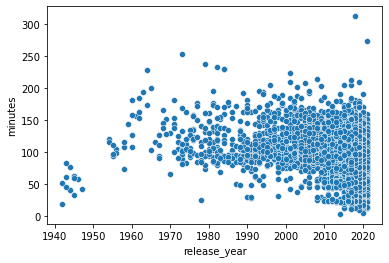

In [107]:
sns.scatterplot(df_ym, x='release_year', y='minutes');

### Тренд на производство сериалов вместо фильмов растет с каждым годом?

In [108]:
df_ty = df[['type', 'release_year']]

In [109]:
df_ty = df_ty.groupby(['release_year', 'type'])['type'].count().unstack().fillna(0).astype('int').reset_index()
df_ty.columns.name = None

Определим отношение сериалов к фильмам.

In [110]:
df_ty['ratio'] = df_ty['TV Show']/df_ty['Movie']

In [111]:
alpha = 0.05

correlation, pvalue = st.spearmanr(df_ty.ratio, df_ty.release_year)

print(f'Корреляция равна: {correlation}, p: {pvalue}')

if pvalue < alpha:
    print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')
else:
    print('Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)')

Корреляция равна: 0.6071900798123893, p: 9.725021131905775e-09
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)


Имеется сильная положительная связь между отношением сериалов (тв шоу) к фильмам.

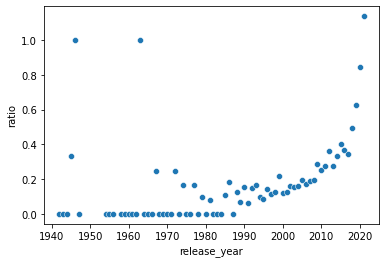

In [112]:
sns.scatterplot(df_ty, x='release_year', y='ratio');

## Выводы

- В данных есть следующие проблемы: пропуски в режисере, актерах, стране, дате добавления, рэйтинге, продолжительности. Кроме того есть проблемы с типами данных. Все проблемы были решены.
- Много фильмов, где в производстве учавствует сразу несколько стран и режиссеров.
- У одного фильма или сериала может быть несколько жанров.
- Фильмы в базе выпущены от 1925 до 2021 года. Основная часть тайтлов выпущена после 2015 года. Нижняя граница даты релиза основной массы тайтлов расположена на уровне 2005 года.
- Медианное количество сезонов шоу/сериалов - 1. Максимальное - 17. Сериалы и TV Show в основном представлены 1-2 сезонами.
- Средняя продолжительность фильма 99 минут. Лидируют по количеству фильмы на Ё90 минут - полтора часа. Основная продолжительность фильмов лежит в диапазоне от 50 до 150 минут.
- Больше всего фильмов и сериалов со взрослым и подростковым рейтингом.
- Тройка лидеров стран - производителей контента: США, Индия, Великобритания.
- Самые популярные режиссеры Jan Suter, Raul Campos, Suhas Kadav.
- В США популярны драмы, документальные фильмы и комедии. В Великобритании - драмы, документальные фильмы и боевики. В Индии - драмы, комедии и боевики, а вот документальные тайтлы в аутсайдерах.
- Возрастные рейтинги и режиссеры являются зависимыми переменными, как и рейтинги и страны.
- Корреляция между продолжительностью фильма и годом выпуска слабая отрицательная, но она есть. Ранние фильмы включенные в сервис были более продолжительны.
- Тренд на производство сериалов вместо фильмов растет с каждым годом.